# # **Explaratory Data Analysis**

In [16]:
#Load all libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import plotly.graph_objects as go
import datetime as dt
import matplotlib.image as mpimg

In [17]:
#Load all the datasets
articles = pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/articles.csv")
customers = pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/customers.csv")
transactions = pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/transactions_train.csv")

In [18]:
# Let's find out the shapes of all three dataframes
shape=pd.DataFrame({"Total Rows":[articles.shape[0],customers.shape[0],transactions.shape[0]],
                    "Total Columns":[articles.shape[1],customers.shape[1],transactions.shape[1]]},index=['articles','customers','transactions'])
shape

,Total Rows,Total Columns
articles,105542,25
customers,1371980,7
transactions,31788324,5


In [19]:
n = len(pd.unique(transactions['customer_id'])) 
m = len(pd.unique(customers['customer_id'])) 
length=len(set(transactions.customer_id.values.tolist()))/customers.shape[0]
npur=100-(length*100)
print("Total No of customers:",m)
print("No of customers who made at least one transaction:",n)
print("% of customers who made a at least one transaction : ",length*100)
print("Number of customers who did not make a purchase : ",(customers.shape[0] - len(set(transactions.customer_id.values.tolist()))))
print("% of customers who did not make a purchase : ",npur)
print("It seems that not all customers made a purchase, there is around 1% with no purchase history.")

Total No of customers: 1371980
No of customers who made at least one transaction: 1362281
% of customers who made a at least one transaction :  99.29306549658158
Number of customers who did not make a purchase :  9699
% of customers who did not make a purchase :  0.7069345034184238
It seems that not all customers made a purchase, there is around 1% with no purchase history.


In [20]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [21]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [22]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [23]:
#check null values in transaction dataset
transactions.isna().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

# **Articles Sold**

In [24]:
year=transactions.groupby('t_dat').count()[['article_id']]
yearwise1=year.reset_index()
#yearwise1.head()
print (transactions.t_dat.min())
print (transactions.t_dat.max())

2018-09-20
2020-09-22


In [25]:
yearasecact = yearwise1.sort_values(['article_id'], ascending=False).head(5)
yearasecact

,t_dat,article_id
373,2019-09-28,198622
569,2020-04-11,162799
435,2019-11-29,160875
64,2018-11-23,142018
9,2018-09-29,141700


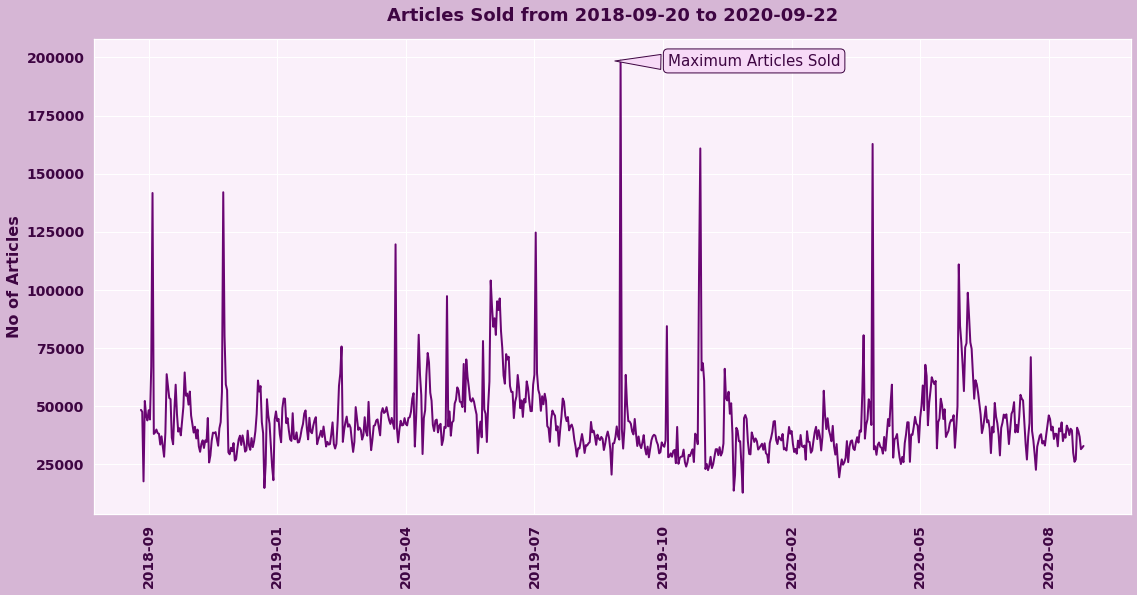

In [26]:
yearwise1['t_dat'] = pd.to_datetime(yearwise1['t_dat'], format='%Y/%m/%d')

sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(facecolor='#d6b6d5')
fig.set_size_inches(18,12)

ax.plot('t_dat', 'article_id', data=yearwise1, color='#6a0573', linewidth=2)

plt.tight_layout()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
plt.xticks(rotation=90)
ttl = ax.set_title('Articles Sold from 2018-09-20 to 2020-09-22', fontsize=18, pad=18, color=font_color, **csfont,fontweight = 'bold')

x_line_annotation = dt.datetime(2019,9,22)

ax.annotate('Maximum Articles Sold',
            xy=(x_line_annotation, 198522),
            xycoords='data',
            xytext=(55, 0), textcoords='offset points',
            size=15, va="center",
            color='#3e0542',
            bbox=dict(boxstyle="round",facecolor='#f7daf7', edgecolor='#3e0542'),
            arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                            facecolor='#f7daf7', 
                            edgecolor='#3e0542',
                            relpos=(0.1, 0.4)))


ttl.set_position([.5, 1.02])
ax.set_ylabel('No of Articles', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
plt.xticks(color=font_color, **hfont,fontweight = 'bold')
plt.yticks(color=font_color, **hfont,fontweight = 'bold')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
# Adjust subplots so that the title and labels would fit
plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)

In [27]:
yearp=transactions.groupby('t_dat').sum()[['price']]
yearwise1p=yearp.reset_index()
#yearwise1p.head()
print (yearwise1p.price.max())

6161.6030677966


In [28]:
yearasec = yearwise1p.sort_values(['price'], ascending=False).head(5)
yearasec

,t_dat,price
373,2019-09-28,6161.603068
435,2019-11-29,4444.342390
9,2018-09-29,4071.381305
569,2020-04-11,3961.987763
64,2018-11-23,3891.939441


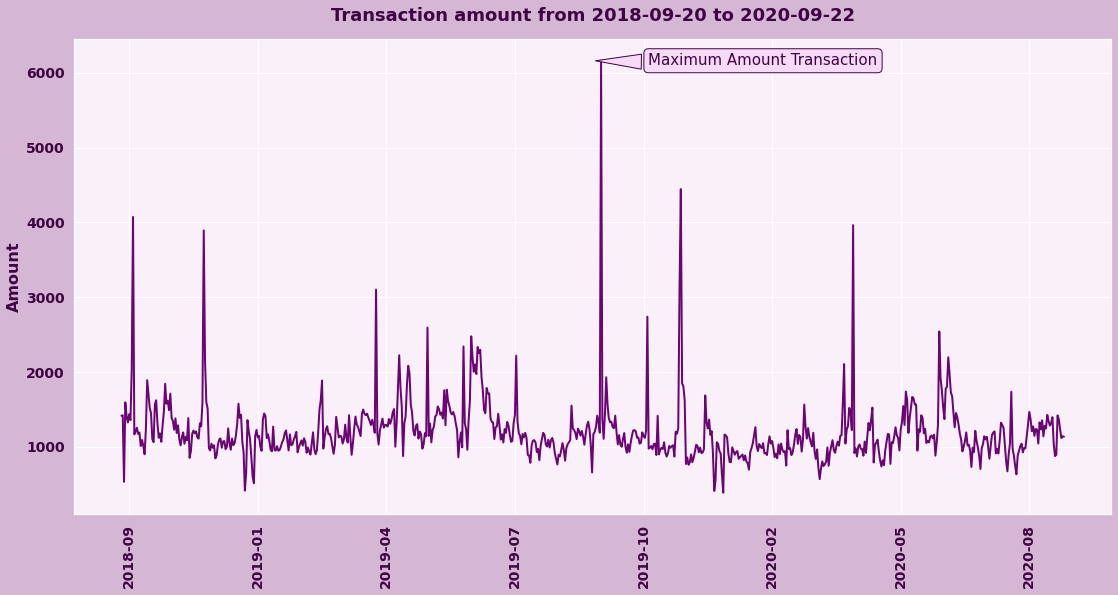

In [29]:
yearwise1p['t_dat'] = pd.to_datetime(yearwise1p['t_dat'], format='%Y/%m/%d')

sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(facecolor='#d6b6d5')
fig.set_size_inches(18,12)

ax.plot('t_dat', 'price', data=yearwise1p, color='#6a0573', linewidth=2)

plt.tight_layout()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
plt.xticks(rotation=90)
ttl = ax.set_title('Transaction amount from 2018-09-20 to 2020-09-22', fontsize=18, pad=18, color=font_color, **csfont,fontweight = 'bold')
x_line_annotation = dt.datetime(2019,9,22)

ax.annotate('Maximum Amount Transaction',
            xy=(x_line_annotation,6161),
            xycoords='data',
            xytext=(55, 0), textcoords='offset points',
            size=15, va="center",
            color='#3e0542',
            bbox=dict(boxstyle="round",facecolor='#f7daf7', edgecolor='#3e0542'),
            arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                            facecolor='#f7daf7', 
                            edgecolor='#3e0542',
                            relpos=(0.1, 0.4)))

ttl.set_position([.5, 1.02])
ax.set_ylabel('Amount', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
plt.xticks(color=font_color, **hfont,fontweight = 'bold')
plt.yticks(color=font_color, **hfont,fontweight = 'bold')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
# Adjust subplots so that the title and labels would fit

plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)

In [30]:
check=transactions.groupby('customer_id').count()[['article_id']].sort_values('article_id', ascending=False)
newcheck=check.head(10)
newcheck1=newcheck.reset_index()

In [31]:
fig = go.Figure(data=[go.Table(
    header=dict(values = [['<b>Customer ID</b><br>Top 10'],
                ['<b>Item Count</b>']],
                fill_color='#d6b6d5',
                font_color="#3e0542",
                align='left'),
    cells=dict(values=[newcheck1.customer_id, newcheck1.article_id],
               fill_color='#faf0fa',
               align='left'))
])

fig.show()

As shown in the above table top 10 customers are those which bought article more than 1,000 in the last three years.

# **Articles Sold by Age Distribution**

In [32]:
custfin= pd.DataFrame(customers, columns = ['customer_id','age'])

In [33]:
total_tran = pd.merge(custfin,transactions, how='right', on='customer_id')

In [34]:
total_tran["age"].fillna(value=0,inplace=True)
total_tran["age"]=total_tran["age"].apply(int)

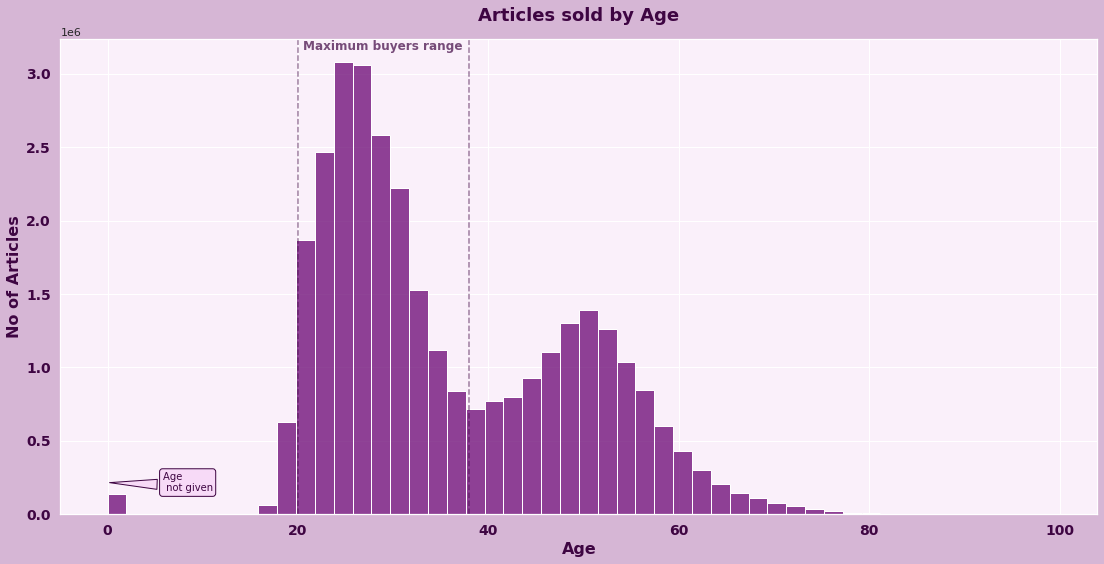

In [35]:
sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(facecolor='#d6b6d5')
fig.set_size_inches(18,12)
ax = sns.histplot(data=total_tran, x='age', bins=50,color='#6a0573')

ax.annotate('Age \n not given',
            xy=(0,216100),
            xycoords='data',
            xytext=(55, 0), textcoords='offset points',
            size=10, va="center",
            color='#3e0542',
            bbox=dict(boxstyle="round",facecolor='#f7daf7', edgecolor='#3e0542'),
            arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                            facecolor='#f7daf7', 
                            edgecolor='#3e0542',
                            relpos=(0.1, 0.4)))

ax.axvline(x=20, linestyle='dashed', alpha=0.5,color='#3e0542')
ax.axvline(x=38, linestyle='dashed', alpha=0.5,color='#3e0542')
ax.text(x=20.5, y=3161000, s='Maximum buyers range', alpha=0.7, color='#3e0542',fontweight = 'bold')
ttl.set_position([.5, 1.02])
ax.set_ylabel('No of Articles', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
ax.set_xlabel('Age', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
plt.xticks(color=font_color, **hfont,fontweight = 'bold')
plt.yticks(color=font_color, **hfont,fontweight = 'bold')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
ttl = ax.set_title('Articles sold by Age', fontsize=18, pad=18, color=font_color, **csfont,fontweight = 'bold')

# Adjust subplots so that the title and labels would fit

plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)

The distribution shows that the maximum buyer range is from 21 to 39 years.Few customers age are not given.

# **Articles Sold by Sales Channel**

In [36]:
datanew= pd.DataFrame(total_tran, columns = ['price','t_dat','sales_channel_id','article_id'])
df = datanew.groupby(["t_dat", "sales_channel_id"])["article_id"].count().reset_index()
print (df.article_id.max())
print (df.article_id.min())

168688
4


In [37]:
dfasec = df.sort_values(['article_id'], ascending=True).head(5)
dfasec

,t_dat,sales_channel_id,article_id
1140,2020-05-04,1,4
1137,2020-05-02,1,5
192,2018-12-25,1,43
922,2019-12-25,1,46
1151,2020-05-10,1,90


In [38]:
df['t_dat'] = pd.to_datetime(df['t_dat'], format='%Y/%m/%d')

In [39]:
xmin = df["t_dat"].min()
xmax = df["t_dat"].max()

ymin = df["article_id"].min() - 1000
ymax = df["article_id"].max() + 1000

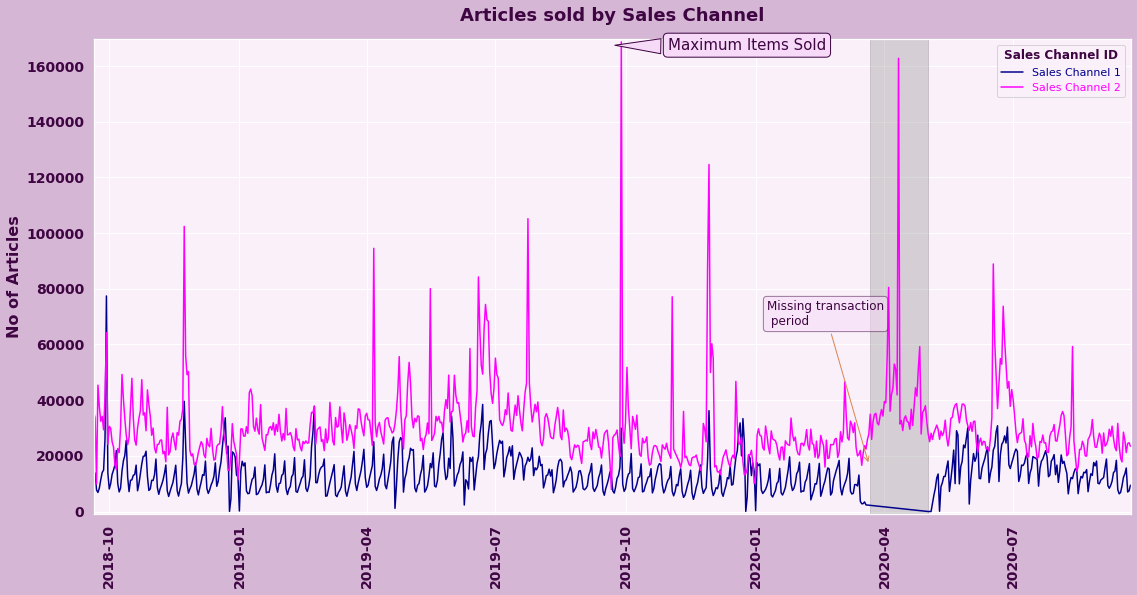

In [40]:
#df['t_dat'] = pd.to_datetime(df['t_dat'], format='%Y/%m/%d')
sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(facecolor='#d6b6d5')
fig.set_size_inches(18,12)

ax.plot(df.loc[df["sales_channel_id"]==1, "t_dat"], df.loc[df["sales_channel_id"]==1, "article_id"], label="Sales Channel 1", color="Darkblue")
ax.plot(df.loc[df["sales_channel_id"]==2, "t_dat"], df.loc[df["sales_channel_id"]==2, "article_id"], label="Sales Channel 2", color="Magenta")
ax.annotate('Maximum Items Sold',
            xy=(x_line_annotation,167500),
            xycoords='data',
            xytext=(55, 0), textcoords='offset points',
            size=15, va="center",
            color='#3e0542',
            bbox=dict(boxstyle="round",facecolor='#f7daf7', edgecolor='#3e0542'),
            arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                            facecolor='#f7daf7', 
                            edgecolor='#3e0542',
                            relpos=(0.1, 0.4)))
ax.set_ylim(ymin, ymax)
ax.set_xlim(xmin, xmax)

ax.fill_betweenx([ymin,ymax],18343, 18384, color="gray", alpha=0.3)

props = dict(boxstyle='round',facecolor='#f7daf7', edgecolor='#3e0542', alpha=0.5)
ax.annotate("Missing transaction\n period", (18342, 17000), (18270, 67000), \
    arrowprops={"arrowstyle": "->", "color":"C1"},
    color='#3e0542',
    bbox=props,
    fontproperties='italic'
    );


ax.set_ylabel('No of Articles', color=font_color, fontsize=16, **hfont,fontweight = 'bold')

plt.xticks(color=font_color, **hfont,fontweight = 'bold')
plt.yticks(color=font_color, **hfont,fontweight = 'bold')
plt.xticks(rotation=90)
legend=plt.legend(title="Sales Channel ID",labelcolor='linecolor')
plt.setp(legend.get_title(), color='#3e0542',fontweight = 'bold')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
plt.title(f"Articles sold by Sales Channel",fontsize=18, pad=18, color=font_color, **csfont,fontweight = 'bold')
plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)

There are two sales channel 1 and 2.Sales channel 2 has the highest sold record as compared to sales channel 1.Transactions are also missing for sales channel 1 for few months.

# **Articles sold by Product Group**

In [41]:
datanew1= pd.DataFrame(transactions, columns = ['article_id','price'])
artdept=pd.DataFrame(articles, columns = ['article_id','colour_group_name','department_name','index_group_name','product_group_name'])


In [42]:
department = pd.merge(artdept,datanew1, how='right', on='article_id')

In [43]:
departmentc=department.groupby(['product_group_name','index_group_name'])['article_id'].count().reset_index()
departmentc1 = departmentc.sort_values(['article_id'], ascending=False)

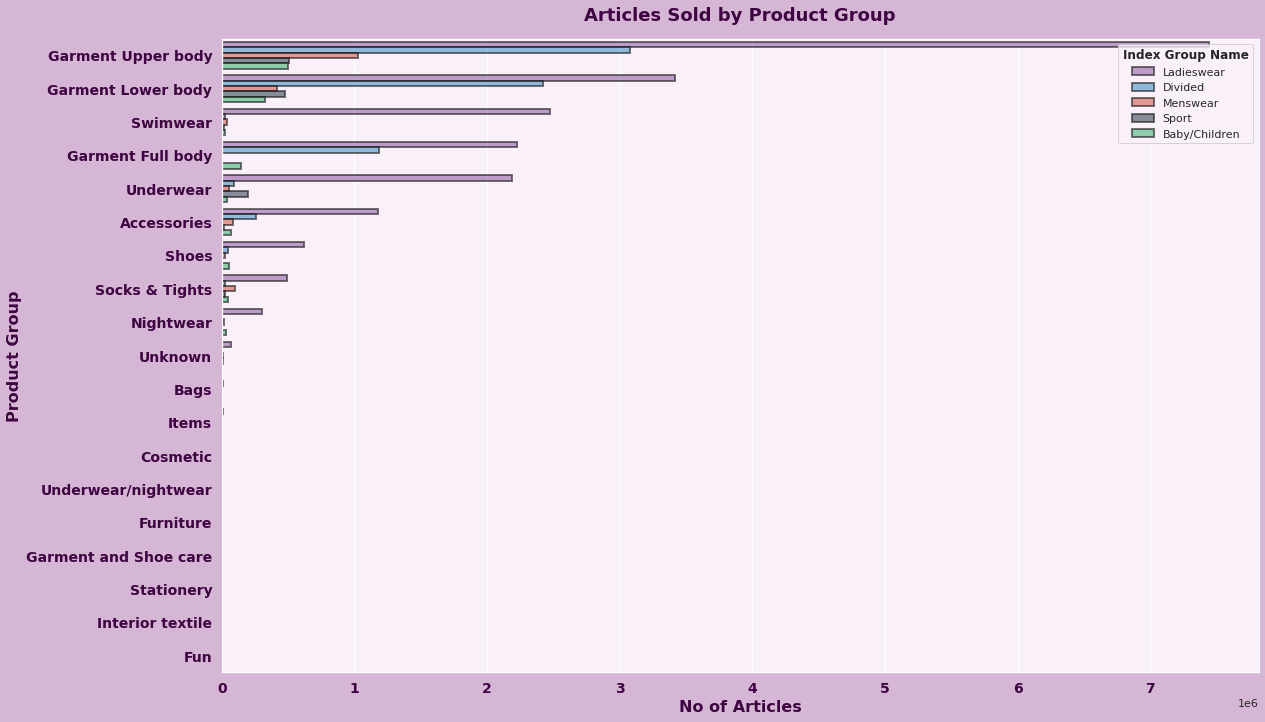

In [44]:
sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(facecolor='#d6b6d5')
fig.set_size_inches(18,16)
flatui = ["#9b59b6", "#3498db", "#e74c3c", "#34495e", "#2ecc71"]

sns.barplot(data=departmentc1,y="product_group_name", x="article_id",hue="index_group_name",palette=flatui,alpha = 0.6, edgecolor = 'k', linewidth = 2)

plt.tight_layout()


ttl = ax.set_title('Articles Sold by Product Group', fontsize=18, pad=18, color=font_color, **csfont,fontweight = 'bold')


ttl.set_position([.5, 1.02])
ax.set_ylabel('Product Group', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
ax.set_xlabel('No of Articles', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
plt.xticks(color=font_color, **hfont,fontweight = 'bold')
plt.yticks(color=font_color, **hfont,fontweight = 'bold')
legend=plt.legend(title="Index Group Name")
plt.setp(legend.get_title(),fontweight = 'bold')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
# Adjust subplots so that the title and labels would fit

plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)

As shown in the chart Ladieswear index group are more dominant for top 5 product group.However the second index group is divided.

# **Articles Sold by Department**

In [45]:
departmentp=department.groupby(['department_name'])['article_id'].count().reset_index()
departmentp1 = departmentp.sort_values(['article_id'], ascending=False).head(50)

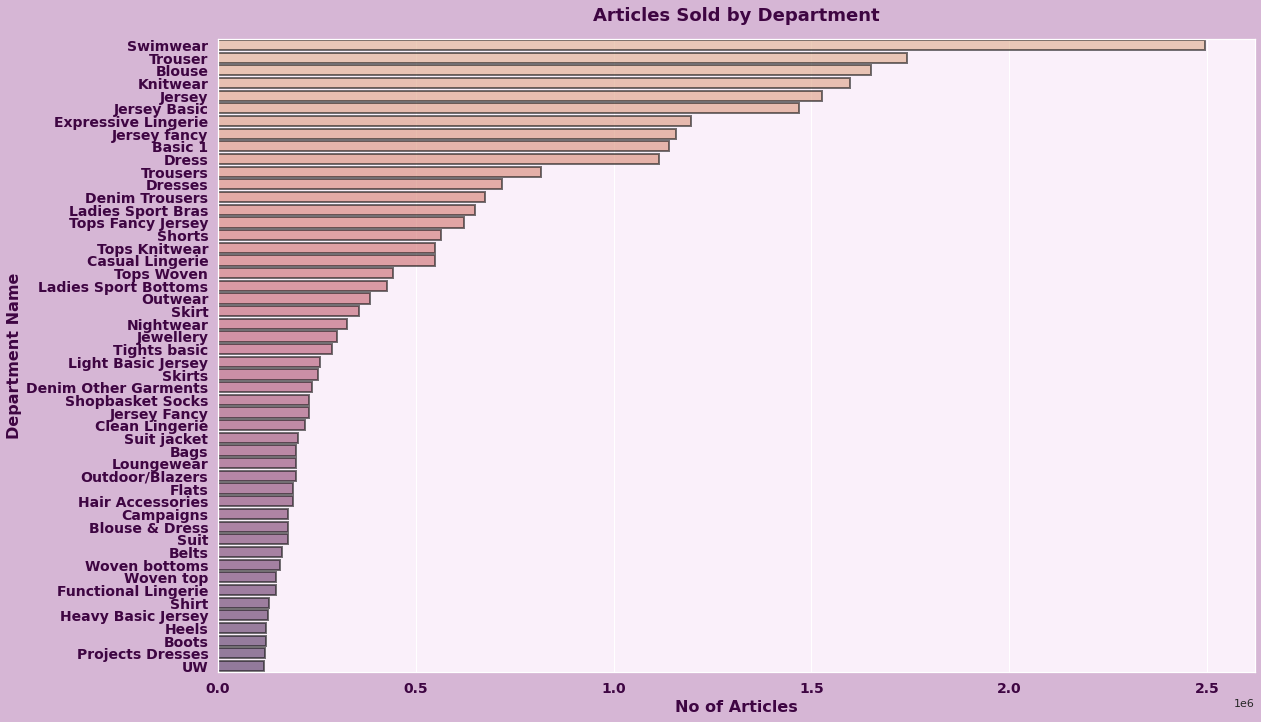

In [46]:
sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(facecolor='#d6b6d5')
fig.set_size_inches(18,16)
sns.barplot(data=departmentp1,y="department_name", x="article_id",palette="flare",alpha = 0.6, edgecolor = 'k', linewidth = 2)
plt.tight_layout()
ttl = ax.set_title('Articles Sold by Department', fontsize=18, pad=18, color=font_color, **csfont,fontweight = 'bold')
ttl.set_position([.5, 1.02])
ax.set_ylabel('Department Name', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
ax.set_xlabel('No of Articles', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
plt.xticks(color=font_color, **hfont,fontweight = 'bold')
plt.yticks(color=font_color, **hfont,fontweight = 'bold')

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
# Adjust subplots so that the title and labels would fit

plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)

As shown in chart the articles swimwear,trouser and blouse are the most dominant.

# **Articles Sold by Colour**

In [47]:
art1=pd.DataFrame(articles, columns = ['article_id','colour_group_name','garment_group_name','section_name','product_type_name'])


In [48]:
dep1 = pd.merge(art1,datanew1, how='right', on='article_id')

In [49]:
dep2=dep1.groupby(['colour_group_name'])['article_id'].count().reset_index()
depa = dep2.sort_values(['article_id'], ascending=False)

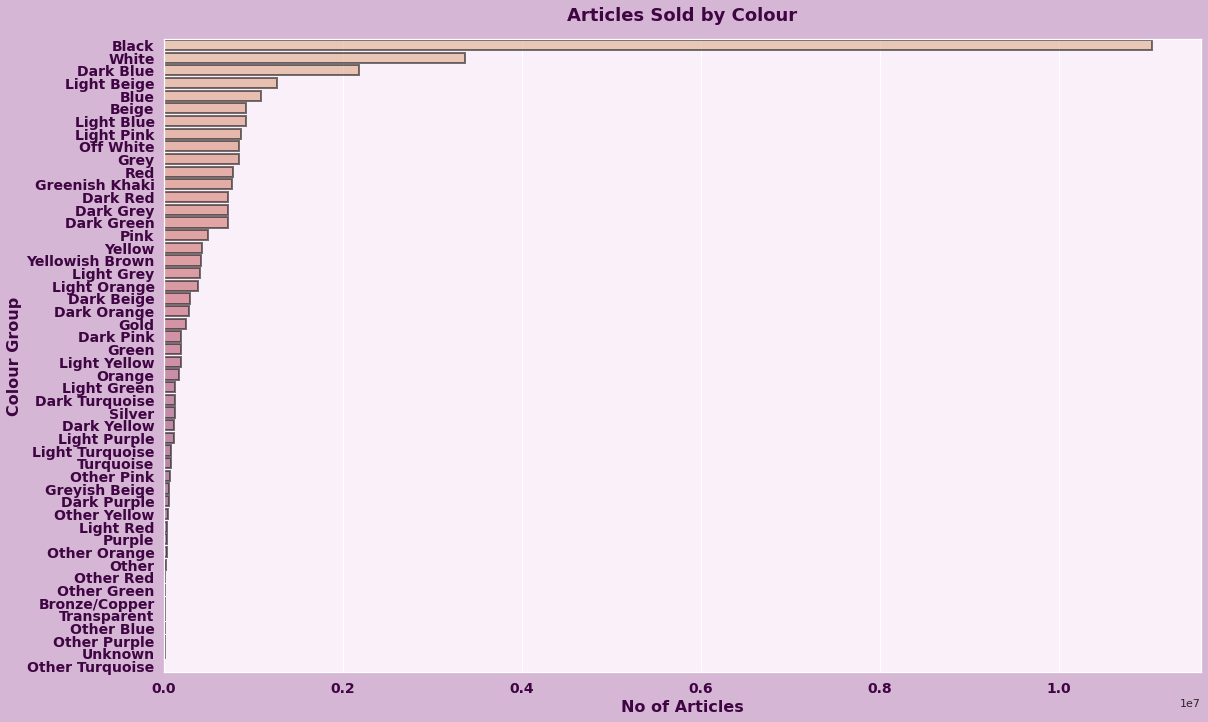

In [50]:
sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(facecolor='#d6b6d5')
fig.set_size_inches(18,16)
sns.barplot(data=depa,y="colour_group_name", x="article_id",palette="flare",alpha = 0.6, edgecolor = 'k', linewidth = 2)
plt.tight_layout()
ttl = ax.set_title('Articles Sold by Colour', fontsize=18, pad=18, color=font_color, **csfont,fontweight = 'bold')
ttl.set_position([.5, 1.02])
ax.set_ylabel('Colour Group', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
ax.set_xlabel('No of Articles', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
plt.xticks(color=font_color, **hfont,fontweight = 'bold')
plt.yticks(color=font_color, **hfont,fontweight = 'bold')

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
# Adjust subplots so that the title and labels would fit

plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)

Black color garments are highly demanded by the customers.

# **Articles Sold by Garment**

In [51]:
dep3=dep1.groupby(['garment_group_name'])['article_id'].count().reset_index()
depa1 = dep3.sort_values(['article_id'], ascending=False)

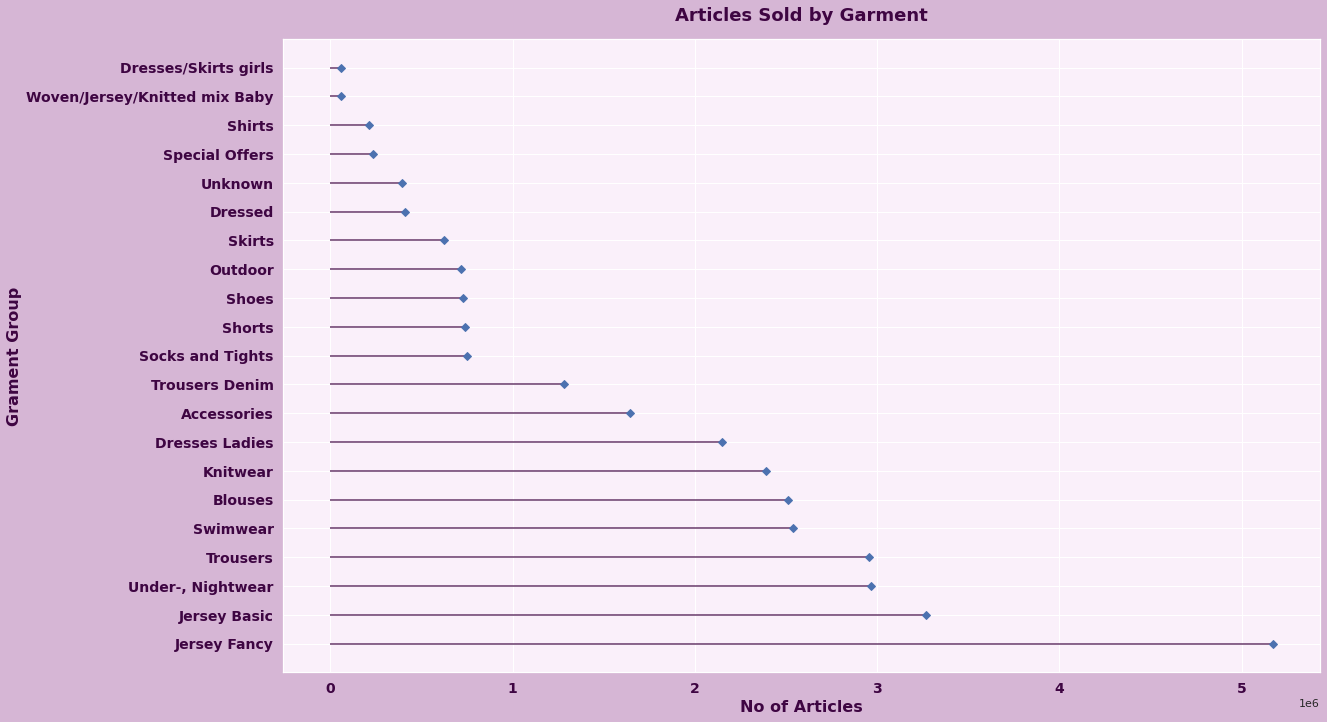

In [52]:
sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(facecolor='#d6b6d5')
fig.set_size_inches(18,16)
plt.hlines(data=depa1,y="garment_group_name",xmin=0,xmax="article_id",alpha = 0.6, edgecolor = 'k', linewidth = 2,color='#3e0542')
plt.plot(depa1['article_id'], depa1['garment_group_name'], "D")
 
plt.tight_layout()
ttl = ax.set_title('Articles Sold by Garment', fontsize=18, pad=18, color=font_color, **csfont,fontweight = 'bold')
ttl.set_position([.5, 1.02])
ax.set_ylabel('Grament Group', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
ax.set_xlabel('No of Articles', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
plt.xticks(color=font_color, **hfont,fontweight = 'bold')
plt.yticks(color=font_color, **hfont,fontweight = 'bold')

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
# Adjust subplots so that the title and labels would fit

plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)

Jersey fancy and basic are the most frequent garment for customers.

# **Fashion News Frequency**

In [53]:
cus=pd.DataFrame(customers, columns = ['club_member_status','fashion_news_frequency','customer_id'])
trans= pd.DataFrame(transactions, columns = ['customer_id'])

In [54]:
custran = pd.merge(cus,trans, how='right', on='customer_id')

In [55]:
ct1=custran.groupby(['fashion_news_frequency'])['customer_id'].count().reset_index()
ct2 = ct1.sort_values(['customer_id'], ascending=False)
#ct2.head()

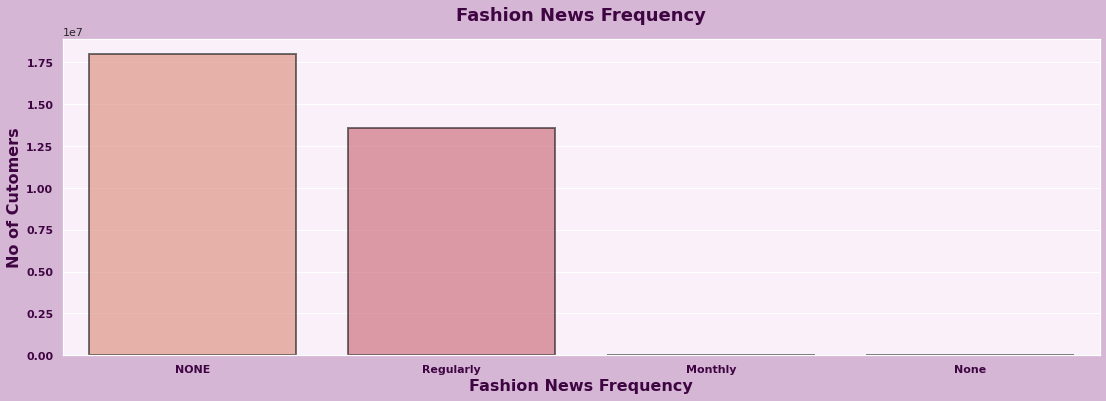

In [56]:
sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(facecolor='#d6b6d5')
fig.set_size_inches(18,8)
sns.barplot(data=ct2,x="fashion_news_frequency", y="customer_id",palette="flare",alpha = 0.6, edgecolor = 'k', linewidth = 2)
ttl = ax.set_title('Fashion News Frequency', fontsize=18, pad=18, color=font_color, **csfont,fontweight = 'bold')
ttl.set_position([.5, 1.02])
ax.set_ylabel('No of Cutomers', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
ax.set_xlabel('Fashion News Frequency', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
plt.xticks(color=font_color, **hfont,fontweight = 'bold')
plt.yticks(color=font_color, **hfont,fontweight = 'bold')
#for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    #label.set_fontsize(14)
# Adjust subplots so that the title and labels would fit
plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)

We see that most of the customers do not recieve ang regular update about fashion news.

# **Club Member Status**

In [57]:
cms1=custran.groupby(['club_member_status'])['customer_id'].count().reset_index()
cms2 = cms1.sort_values(['customer_id'], ascending=False)
#cms2.head()

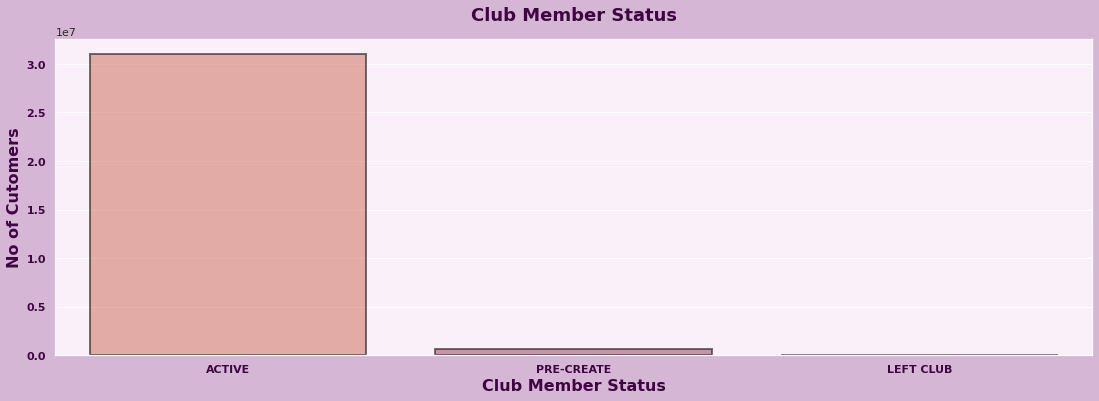

In [58]:
sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(facecolor='#d6b6d5')
fig.set_size_inches(18,8)
sns.barplot(data=cms2,x="club_member_status", y="customer_id",palette="flare",alpha = 0.6, edgecolor = 'k', linewidth = 2)
ttl = ax.set_title('Club Member Status', fontsize=18, pad=18, color=font_color, **csfont,fontweight = 'bold')
ttl.set_position([.5, 1.02])
ax.set_ylabel('No of Cutomers', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
ax.set_xlabel('Club Member Status', color=font_color, fontsize=16, **hfont,fontweight = 'bold')
plt.xticks(color=font_color, **hfont,fontweight = 'bold')
plt.yticks(color=font_color, **hfont,fontweight = 'bold')
#for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    #label.set_fontsize(14)
# Adjust subplots so that the title and labels would fit
plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)

Most of the customers have an active membership status,only few are in pre-create status and no one with left club status.

# **Mean Price for Articles**

In [59]:
articles_for_merge = articles[['article_id', 'product_group_name']]

In [60]:
articles_for_merge = transactions[['article_id', 'price', 't_dat']].merge(articles_for_merge, on='article_id', how='left')

In [61]:
articles_for_merge['t_dat'] = pd.to_datetime(articles_for_merge['t_dat'], format='%Y/%m/%d')

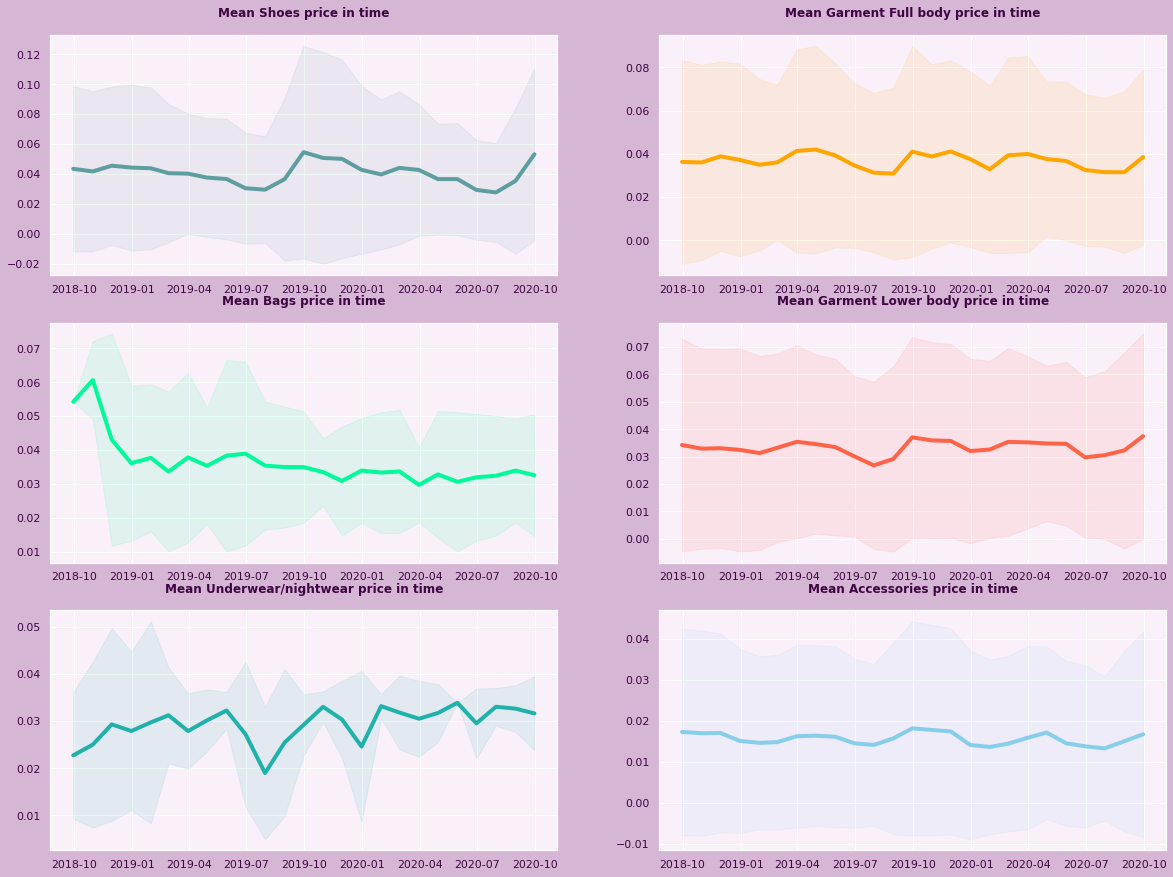

In [62]:
product_list = ['Shoes', 'Garment Full body', 'Bags', 'Garment Lower body', 'Underwear/nightwear','Accessories']
colors = ['cadetblue', 'orange', 'mediumspringgreen', 'tomato', 'lightseagreen','skyblue']
k = 0
sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
fig, ax = plt.subplots(3, 2, figsize=(20, 15),facecolor = '#d6b6d5')

for i in range(3):
    for j in range(2):
        try:
            product = product_list[k]
            articles_for_merge_product = articles_for_merge[articles_for_merge.product_group_name == product_list[k]]
            series_mean = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).mean().fillna(0)
            series_std = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).std().fillna(0)
            ax[i, j].plot(series_mean, linewidth=4, color=colors[k])
            ax[i, j].fill_between(series_mean.index, (series_mean.values-2*series_std.values).ravel(), 
                             (series_mean.values+2*series_std.values).ravel(), color=colors[k], alpha=.1)
            ax[i, j].set_title(f'Mean {product_list[k]} price in time',fontsize=12, pad=18, color=font_color, **csfont,fontweight = 'bold')
            ax[i, j].tick_params(axis='x', colors=font_color)
            ax[i, j].tick_params(axis='y', colors=font_color)
           
            k += 1
        except IndexError:
            ax[i, j].set_visible(False)
plt.show()
